# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


In [1]:

import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
    
scores = pd.read_csv("sat_scores.csv")
scores.colums= {'State', 'Rating', 'Verbal Score', 'Math Score'}
scores.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


##### 1. What does the data describe?



##### 2. Does the data look complete? Are there any obvious issues with the observations?

The data has a suspicious range for the Rate. Rate describes the percentage of participation in the state. However, states like CT and NJ have a high participation rate (above 80%). Other states like MS or ND, have a low participation rate (4%). Why does the data vary so much for a test required to enter college? There could be economic factors. Some states could have a higher level of poverty than others, which would affect education trajectories for individuals. ( not a likely case).  However, going from 4% to 80% is a suspiciously large gap. Another, factor could be that they simply don't participate in SAT because they don't need it. These states might favor a different type of standardized test, like the ACT. In which case, this data set would only be a good representation of how states participate in the SAT, not necessarily how states participate in standardized testing for college entrance. 

##### 3. Create a data dictionary for the dataset.

In [29]:
datadictionary = pd.read_csv("data_dictionary.csv") 
datadictionary.head(5)

,Data Dictionary for Database,_,__,___
0,COLUMN NAME,DATA TYPE,LENGTH,DESCRIPTION
1,State,String,51,State abbreviation for all states and D.C.
2,Rate,Integer,51,Percentage of all eligible people who particip...
3,Verbal,Integer,51,State's average score on the verbal section of...
4,Math,Integer,51,State's average score on the math section of SAT


| Data Dictionary for Database                                         |
|   COLUMN NAME       | DATA TYPE     | LENGTH     | DESCRIPTION       |
|State|String| 51|State abbreviation for all states and D.C.

|Rate | Integer| 51|Percentage of all eligible people who participate in taking the SAT by state



Data Dictionary for Database


| Data Dictionary for Database|
|:-:|---|---|---|
|COLUMN NAME | DATA TYPE| LENGTH |DESCRIPTION |
|State | String | 51 | State abbreviation for all states and D.C. |
|Rate | Integer | 51 |Percentage of all eligible people who participate in taking the SAT by state |
|Verbal | Integer |51 |State's average score on the verbal section of SAT |
|Math |Integer |51 |State's average score on the math  section of SAT |

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [4]:
with open("sat_scores.csv", "rU") as f:
    masterlist = [line.strip().split(',') for line in f]

##### 5. Print the data

In [5]:
print masterlist

[['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12

##### 6. Extract a list of the labels from the data, and remove them from the data.

In [6]:
labels = masterlist.pop(0)
last_delete = masterlist.pop() 
#taking out the last row because it does not represent a state. represents total for each column,


print labels
print last_delete
print masterlist

['State', 'Rate', 'Verbal', 'Math']
['All', '45', '506', '514']
[['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12'

##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [7]:
#myarray = np.array(masterlist, dtype= np.object)
#statelist = myarray[0:,0]

#print type(statelist)

statelist = [row[0] for row in masterlist]
print statelist



['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


##### 8. Print the types of each column

In [8]:
for row in range(len(masterlist)):
    for col in range(0,4):
        print type(masterlist[row][col])

<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>

##### 9. Do any types need to be reassigned? If so, go ahead and do it.

In [9]:
for row in masterlist:
    for i in range(1,4):
        row[i] = int(row[i])
    
    
    
# for every row in master list, take item in index 1 and reassign value to integer type

print masterlist


[['CT', 82, 509, 510], ['NJ', 81, 499, 513], ['MA', 79, 511, 515], ['NY', 77, 495, 505], ['NH', 72, 520, 516], ['RI', 71, 501, 499], ['PA', 71, 500, 499], ['VT', 69, 511, 506], ['ME', 69, 506, 500], ['VA', 68, 510, 501], ['DE', 67, 501, 499], ['MD', 65, 508, 510], ['NC', 65, 493, 499], ['GA', 63, 491, 489], ['IN', 60, 499, 501], ['SC', 57, 486, 488], ['DC', 56, 482, 474], ['OR', 55, 526, 526], ['FL', 54, 498, 499], ['WA', 53, 527, 527], ['TX', 53, 493, 499], ['HI', 52, 485, 515], ['AK', 51, 514, 510], ['CA', 51, 498, 517], ['AZ', 34, 523, 525], ['NV', 33, 509, 515], ['CO', 31, 539, 542], ['OH', 26, 534, 439], ['MT', 23, 539, 539], ['WV', 18, 527, 512], ['ID', 17, 543, 542], ['TN', 13, 562, 553], ['NM', 13, 551, 542], ['IL', 12, 576, 589], ['KY', 12, 550, 550], ['WY', 11, 547, 545], ['MI', 11, 561, 572], ['MN', 9, 580, 589], ['KS', 9, 577, 580], ['AL', 9, 559, 554], ['NE', 8, 562, 568], ['OK', 8, 567, 561], ['MO', 8, 577, 577], ['LA', 7, 564, 562], ['WI', 6, 584, 596], ['AR', 6, 562, 55

##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [10]:
# QUESTION: so are we creating 3 dictionaries? state-rate, state-verbal, state-math


st_rate_dic = {row[0]:row[1] for row in masterlist}
print st_rate_dic



st_verb_dic = {row[0]:row[2] for row in masterlist}
print st_verb_dic


st_math_dic = {row[0]:row[3] for row in masterlist}
print st_math_dic



{'WA': 53, 'DE': 67, 'DC': 56, 'WI': 6, 'WV': 18, 'HI': 52, 'FL': 54, 'WY': 11, 'NH': 72, 'NJ': 81, 'NM': 13, 'TX': 53, 'LA': 7, 'NC': 65, 'ND': 4, 'NE': 8, 'TN': 13, 'NY': 77, 'PA': 71, 'RI': 71, 'NV': 33, 'VA': 68, 'CO': 31, 'AK': 51, 'AL': 9, 'AR': 6, 'VT': 69, 'IL': 12, 'GA': 63, 'IN': 60, 'IA': 5, 'OK': 8, 'AZ': 34, 'CA': 51, 'ID': 17, 'CT': 82, 'ME': 69, 'MD': 65, 'MA': 79, 'OH': 26, 'UT': 5, 'MO': 8, 'MN': 9, 'MI': 11, 'KS': 9, 'MT': 23, 'MS': 4, 'SC': 57, 'KY': 12, 'OR': 55, 'SD': 4}
{'WA': 527, 'DE': 501, 'DC': 482, 'WI': 584, 'WV': 527, 'HI': 485, 'FL': 498, 'WY': 547, 'NH': 520, 'NJ': 499, 'NM': 551, 'TX': 493, 'LA': 564, 'NC': 493, 'ND': 592, 'NE': 562, 'TN': 562, 'NY': 495, 'PA': 500, 'RI': 501, 'NV': 509, 'VA': 510, 'CO': 539, 'AK': 514, 'AL': 559, 'AR': 562, 'VT': 511, 'IL': 576, 'GA': 491, 'IN': 499, 'IA': 593, 'OK': 567, 'AZ': 523, 'CA': 498, 'ID': 543, 'CT': 509, 'ME': 506, 'MD': 508, 'MA': 511, 'OH': 534, 'UT': 575, 'MO': 577, 'MN': 580, 'MI': 561, 'KS': 577, 'MT': 5

##### 11. Create a dictionary with the values for each of the numeric columns

In [11]:
# 3 entries. value for each key is a list. 

ratings = [ row[1] for row in masterlist]
verbal = [row[2] for row in masterlist]
math = [row[3] for row in masterlist]

list_dic = {'Rate': ratings, 'Verbal': verbal, 'Math': math}
print list_dic


{'Rate': [82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56, 55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12, 12, 11, 11, 9, 9, 9, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 4], 'Math': [510, 513, 515, 505, 516, 499, 499, 506, 500, 501, 499, 510, 499, 489, 501, 488, 474, 526, 499, 527, 499, 515, 510, 517, 525, 515, 542, 439, 539, 512, 542, 553, 542, 589, 550, 545, 572, 589, 580, 554, 568, 561, 577, 562, 596, 550, 570, 603, 582, 599, 551], 'Verbal': [509, 499, 511, 495, 520, 501, 500, 511, 506, 510, 501, 508, 493, 491, 499, 486, 482, 526, 498, 527, 493, 485, 514, 498, 523, 509, 539, 534, 539, 527, 543, 562, 551, 576, 550, 547, 561, 580, 577, 559, 562, 567, 577, 564, 584, 562, 575, 593, 577, 592, 566]}


## Step 3: Describe the data

##### 12. Print the min and max of each column

In [12]:
#min_value = min(dict.values())

min_rate = min(st_rate_dic.values())
print min_rate

min_verbal = min(st_verb_dic.values())
print min_verbal

min_math = min(st_math_dic.values())
print min_math

4
482
439


##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [13]:
#

rate_list = list_dic.get('Rate')
rate_mean = np.mean(rate_list)

sd_rate = np.sqrt(sum([((value - rate_mean)** 2) / len(rate_list) for value in rate_list]))
print sd_rate

verbal_list = list_dic.get('Verbal')
verbal_mean = np.mean(verbal_list)

sd_verbal = np.sqrt(sum([((value - verbal_mean)**2)/len(verbal_list) for value in verbal_list]))
print sd_verbal

math_list = list_dic.get("Math")
math_mean = np.mean(math_list)

sd_math = np.sqrt(sum([((value - math_mean)**2) / len(math_list) for value in math_list]))
print sd_math

np.std(math_list)

27.2792386761
33.0319826842
35.9298731731


35.929873173114082

## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

(0, 10)

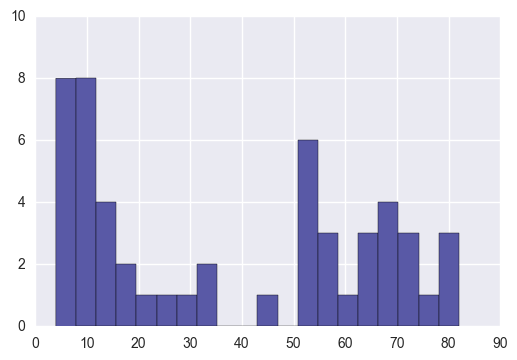

In [17]:
plt.hist(scores.Rate, bins= 20, color= sns.desaturate("blue", 0.3))
plt.ylim(0,10)

# 15. Plot the Math distribution

(0, 7)

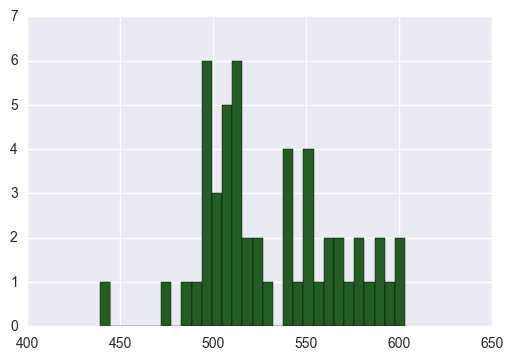

In [20]:
plt.hist(scores.Math, bins= 30, color= sns.desaturate("green", .45))
plt.ylim(0,7)


##### 16. Plot the Verbal distribution

(0, 6)

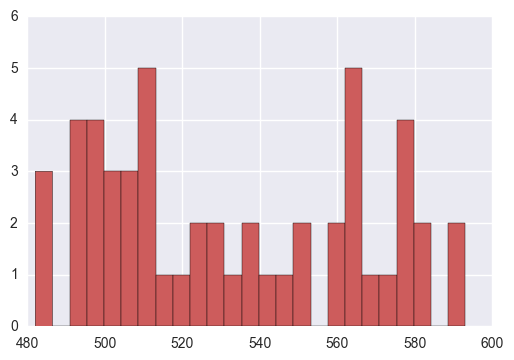

In [25]:
plt.hist(scores.Verbal, bins= 25, color= sns.desaturate("indianred", 1))
plt.ylim(0,6)

##### 17. What is the typical assumption for data distribution?

In [ ]:
"""
Typically we assume that data has a normal distribution with symmetry.
Histograms are used to display distributions to show which bin's of data have the most occurances.
Usually the normal distribution will follow a unimodal bell curve, with the mean median and mode at the center.
This obviously also infers that only numeric values can have a 
data distribution so the data set for states cannot be plotted.
"""

##### 18. Does that distribution hold true for our data?

In [ ]:
"""
The normal distribution does not hold true for our dataset.
The historgrams for Rate and Verbal are bimodal, meaning that the distribution has two peaks.

Math may be the closest to a normal distribution.
However, the curve is not symmetrical and has a left skew.
Which for a unimodal distribution means that there is more area under the curve on the right side of the median.
"""

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

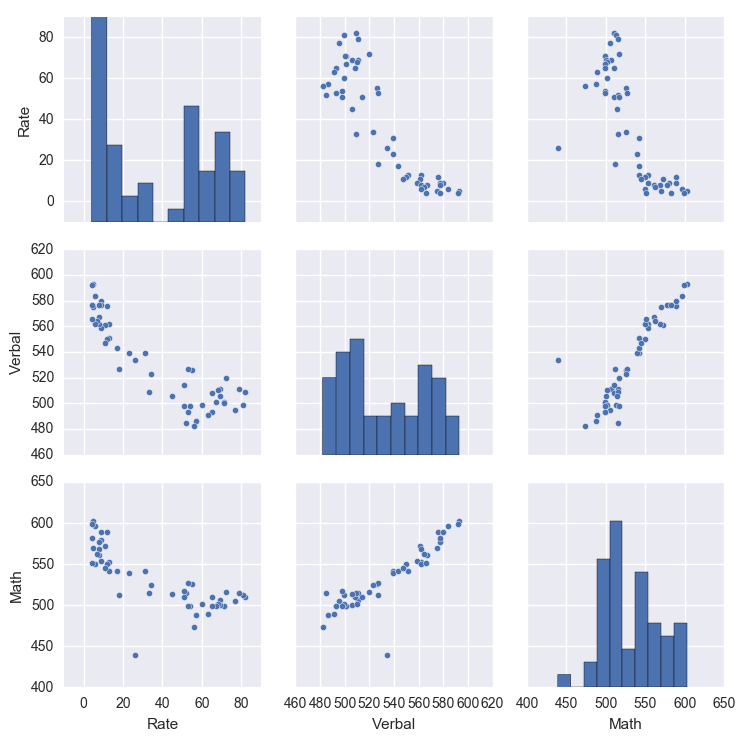

In [51]:
import seaborn as sns

sns.pairplot(scores)


##### 20. Are there any interesting relationships to note?

In [ ]:
"""
If we were to draw a line of best fit, we would see a lot of interesting relationships between our variables.
First, if we were to see the relationship between math and verbal, we would see a positive correlation. 
Meaning, if a state were to have a high average for math, they would be likely to also have a high average for 
verbal. 

Second, if we were to compare 'Rate' with a subject scores, either math or verbal, 
we could infer that they were negatively correlated. 
This raises an interesting question, "Why do states that have a low participation rate, have a higher performance?"
Inversely, "Why do states that have a high participation rate, have a lower performance?"
It is a counter intuitive phenomenon because we would assume that states with more participation would also
be influenced by more environmental factors (like school cirriculum, tutoring centers, high school culture, book stores, etc) 
to perform better. 

This correlation is not explained by our data set and may require a number of more variables to 
explain the correlation.

"""

##### 21. Create box plots for each variable. 

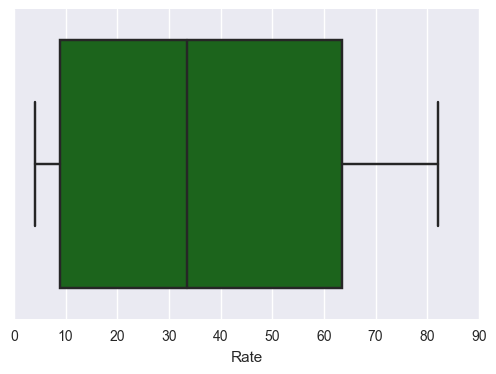

In [107]:
sns.boxplot(scores.Rate, color = sns.desaturate("green", .75))


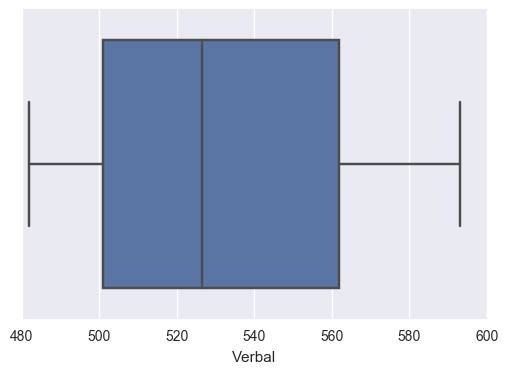

In [79]:
sns.boxplot(scores.Verbal)

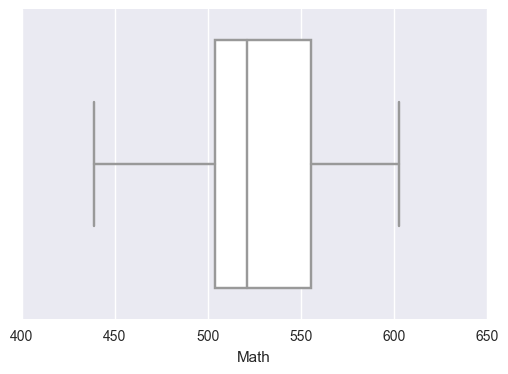

In [111]:
sns.boxplot(scores.Math, color = "white")

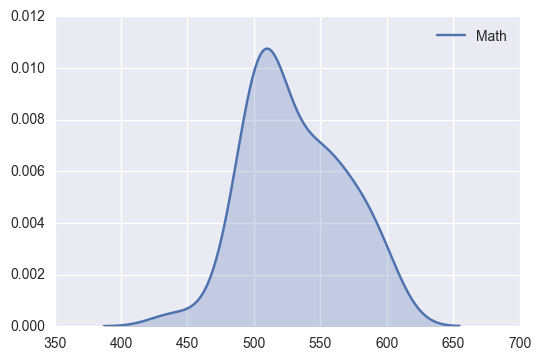

In [112]:
sns.kdeplot(scores.Math.dropna(), shade = True)

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

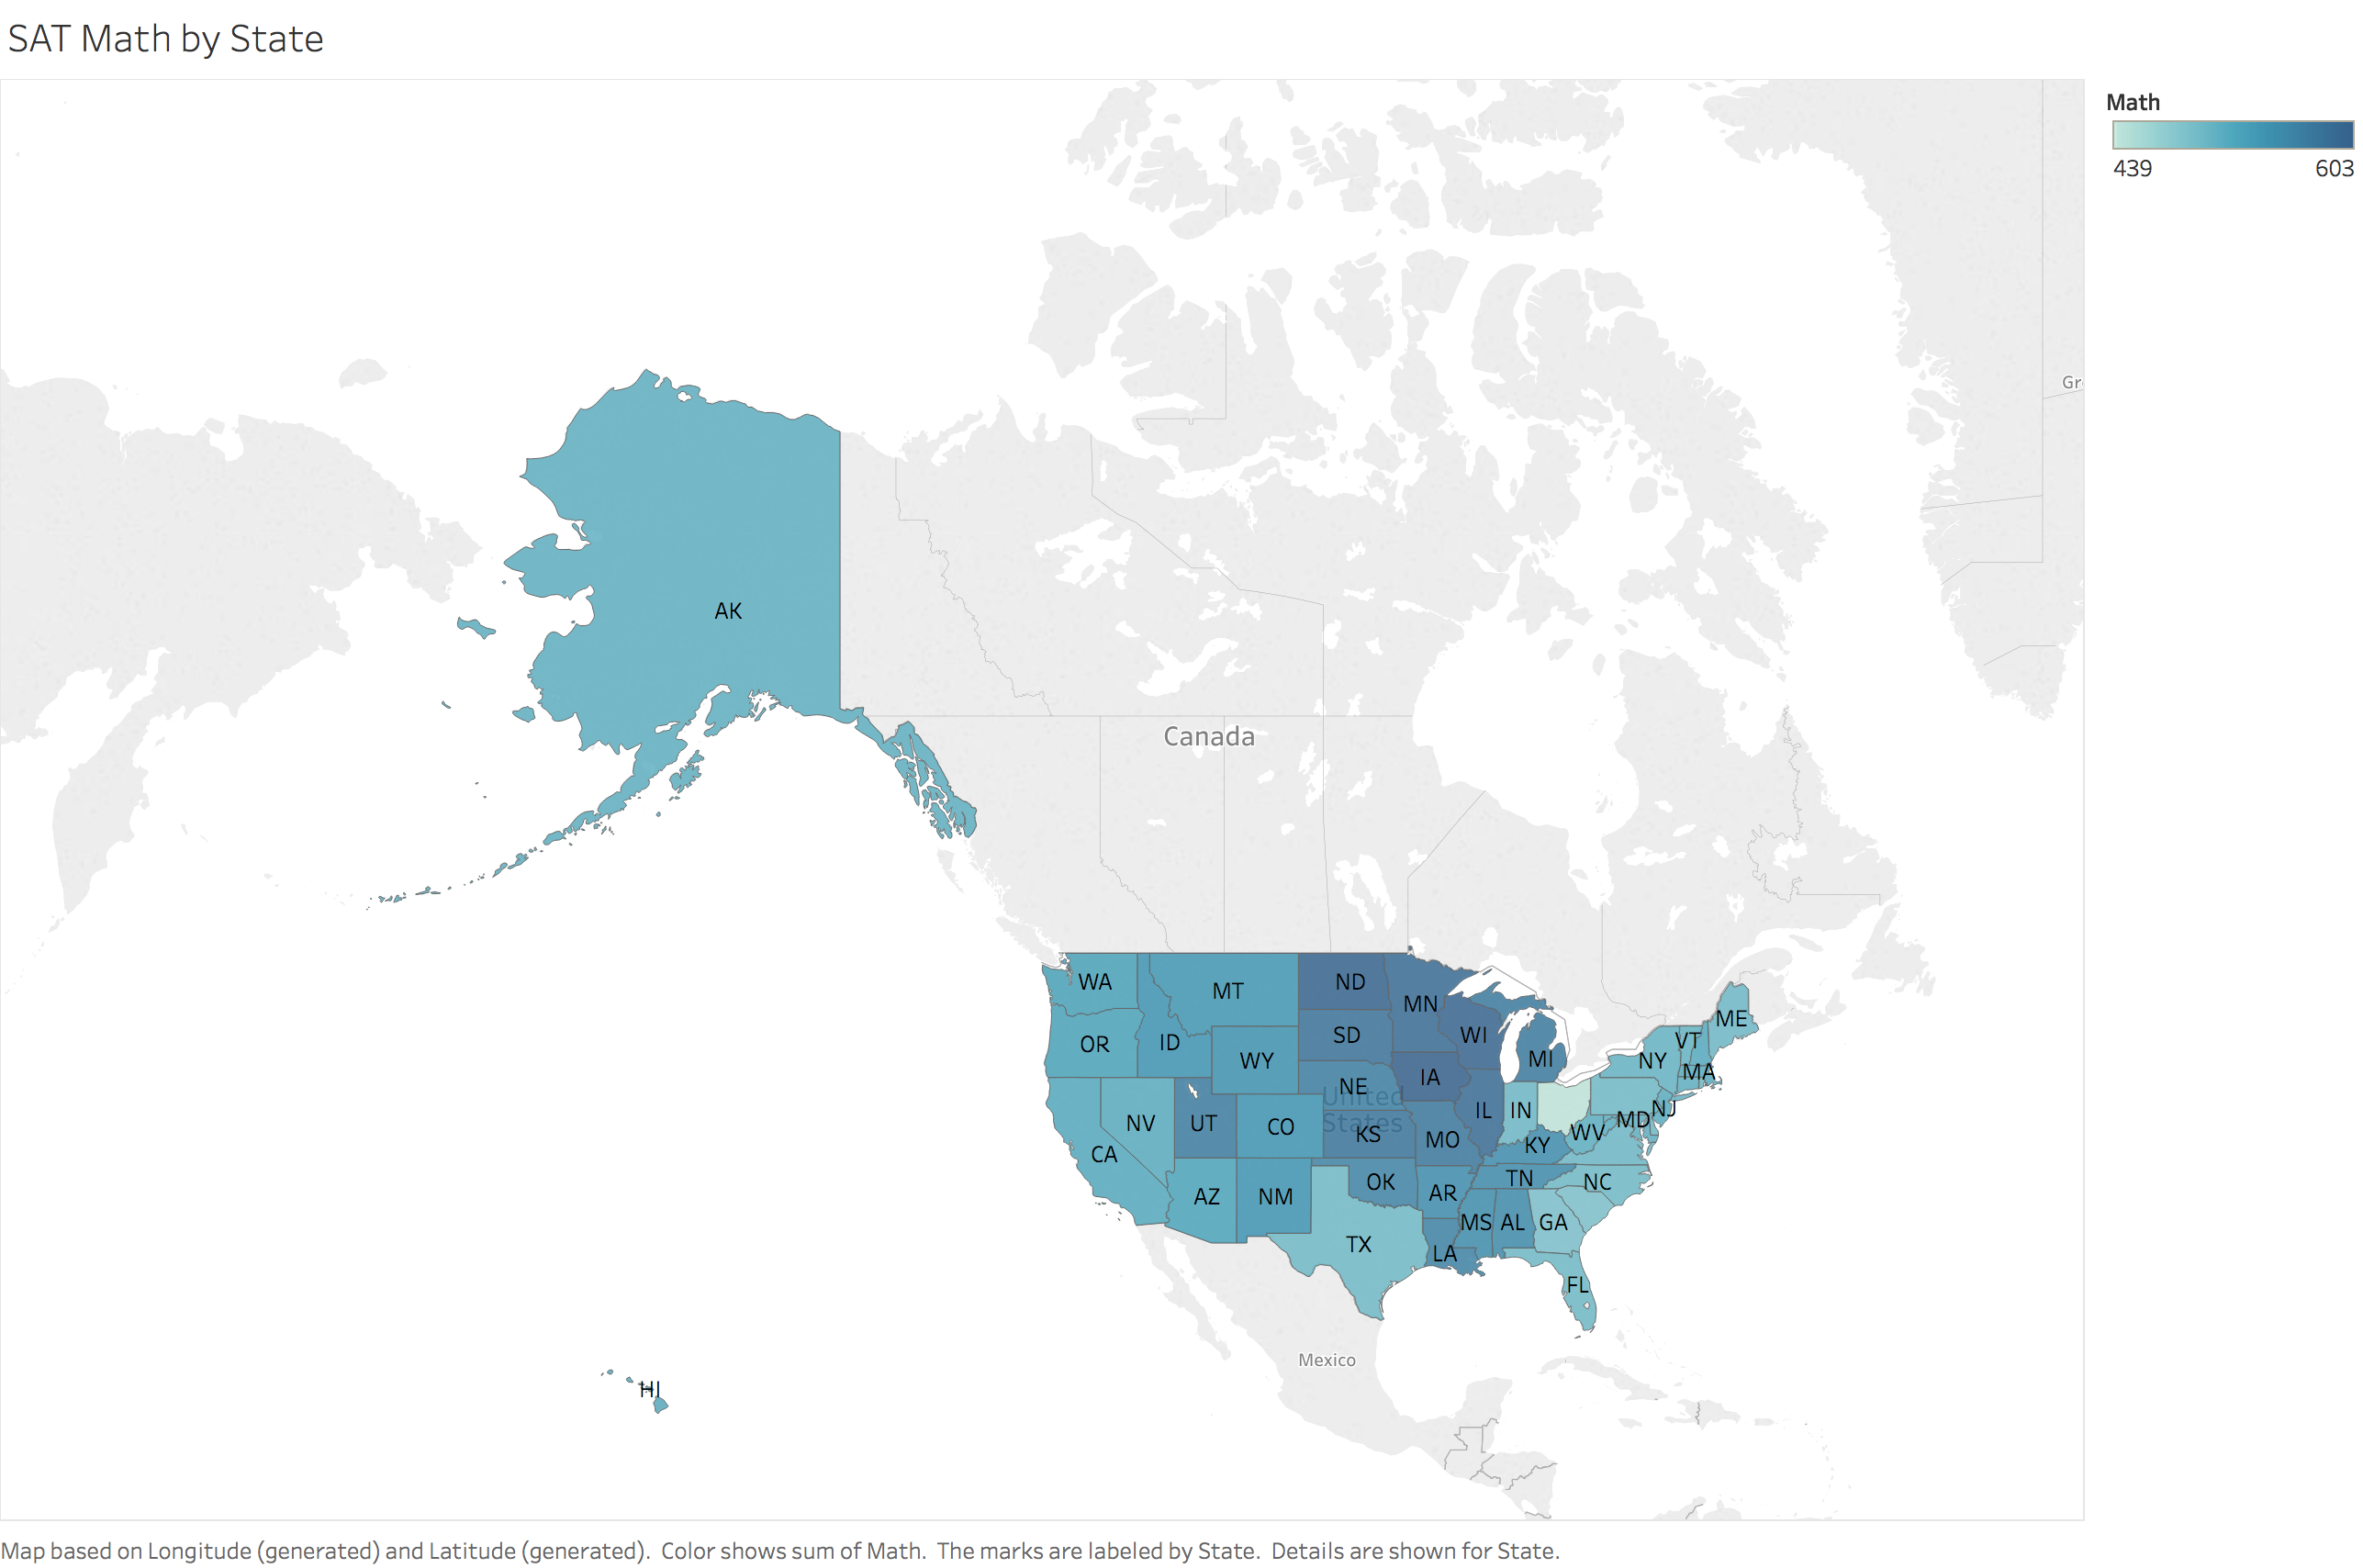

In [6]:
from IPython.display import Image
i = Image(filename='math_state.png')
i


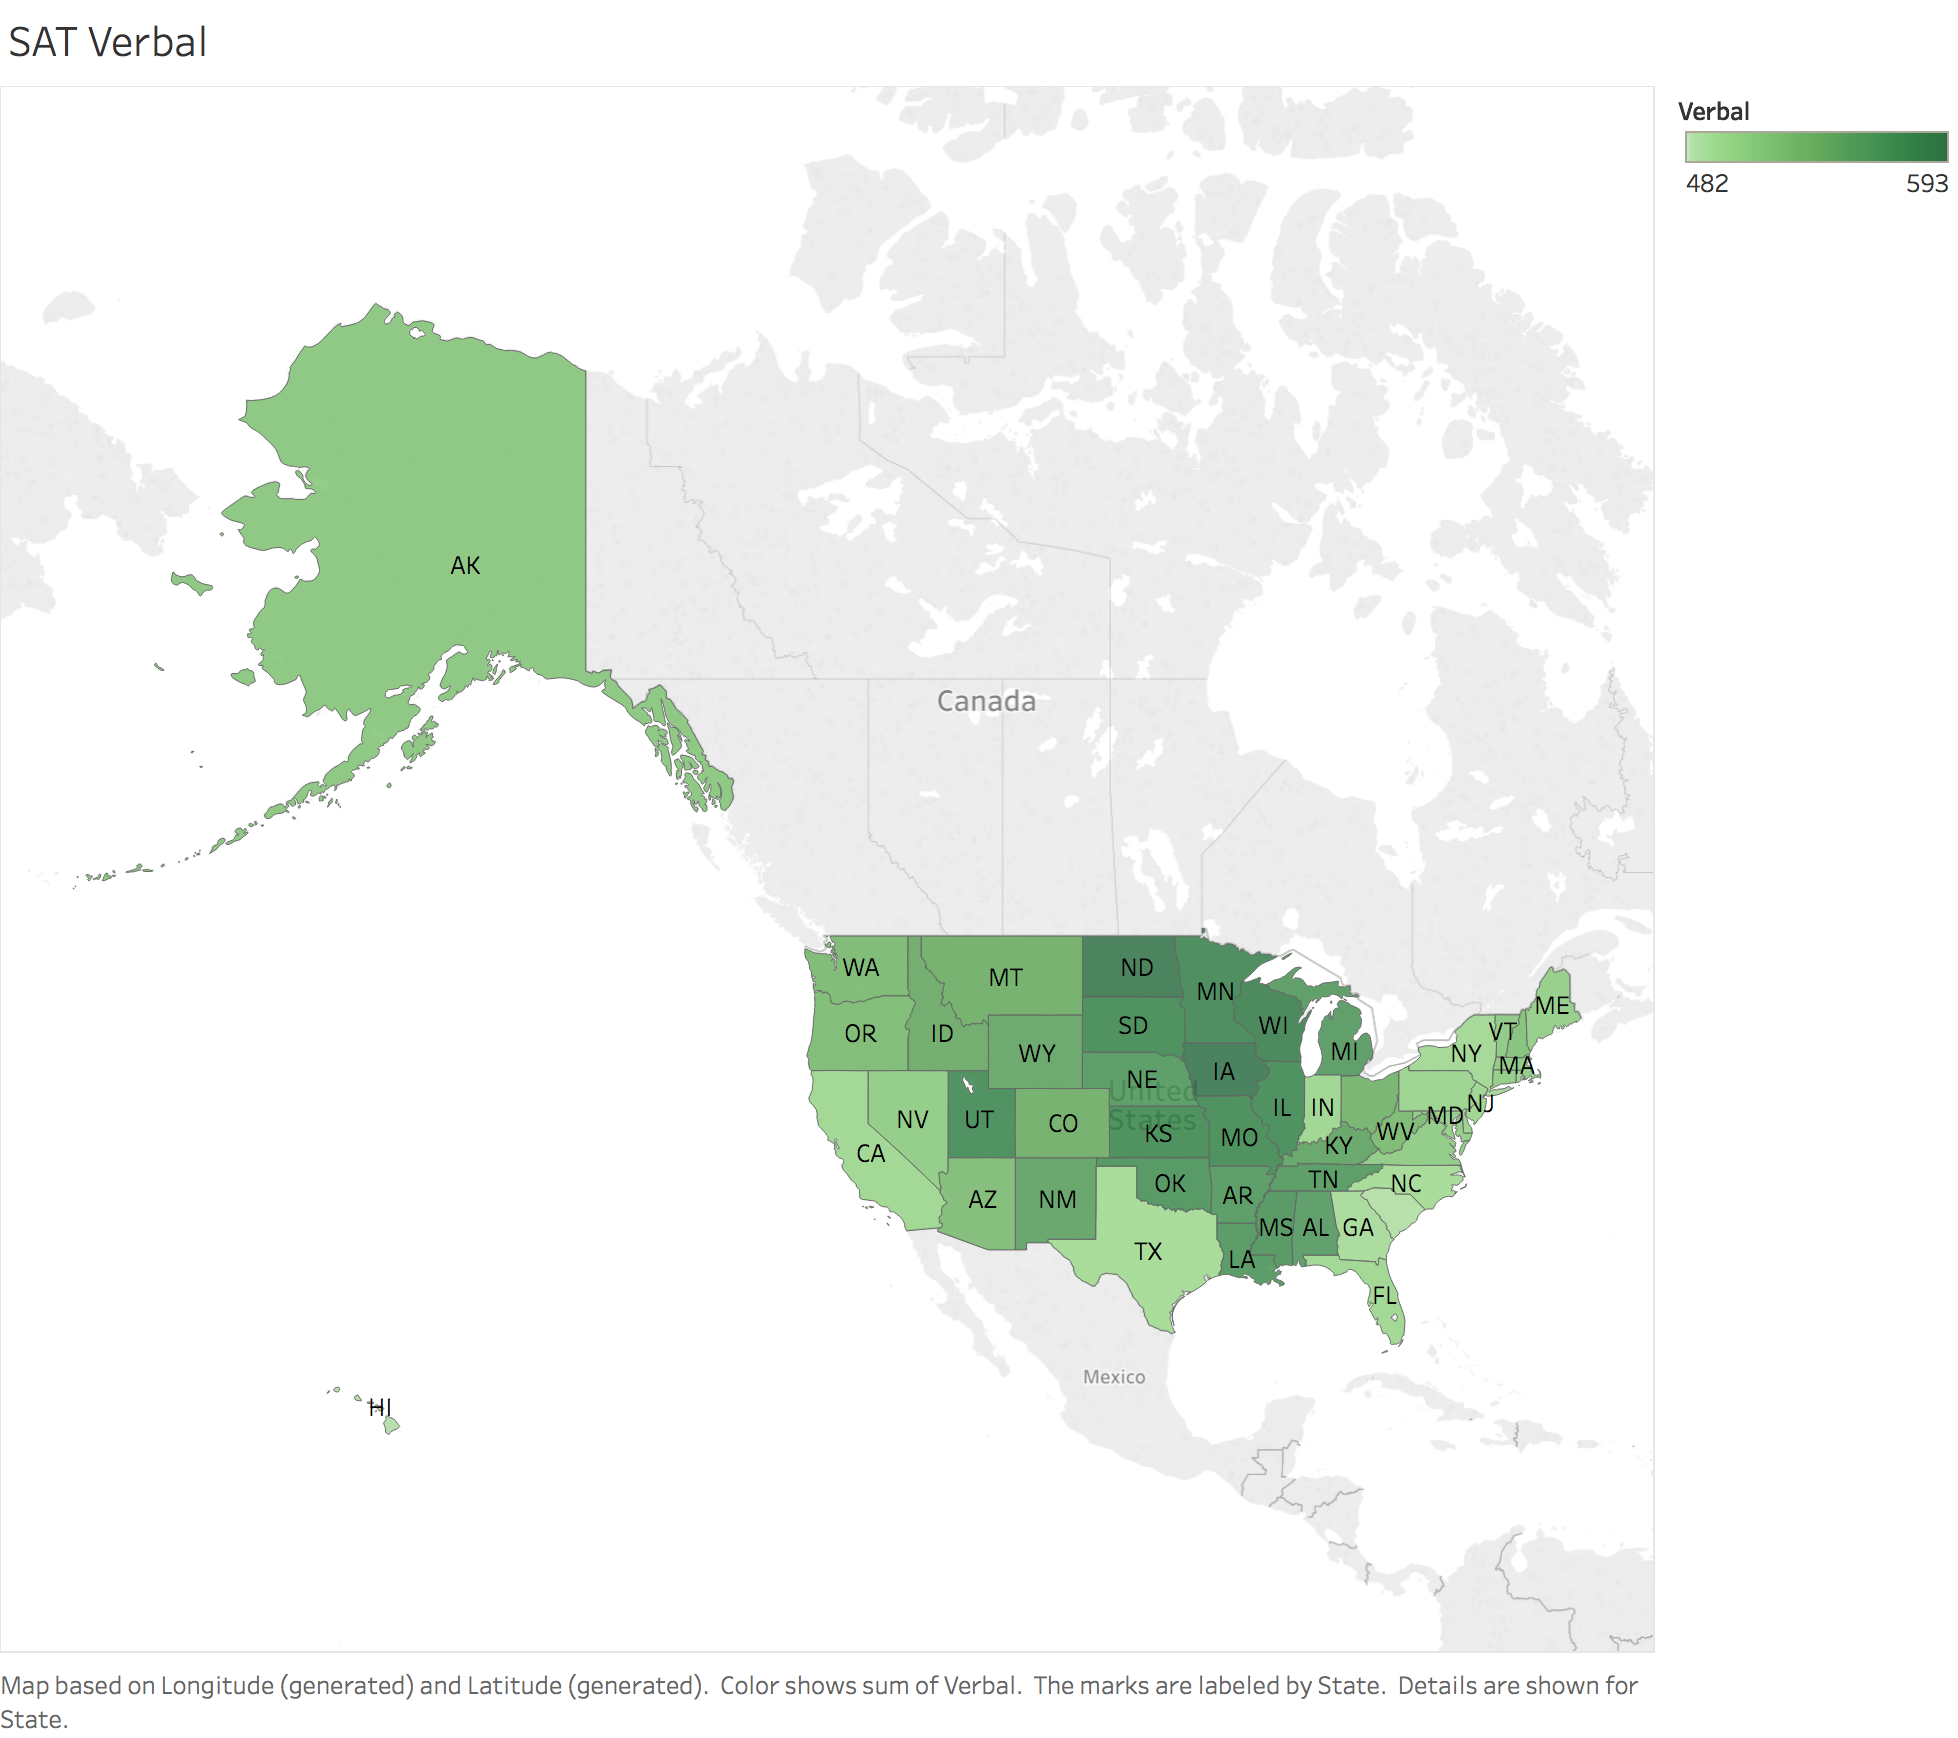

In [26]:
from IPython.display import Image
i = Image(filename='verbal_state.png')
i


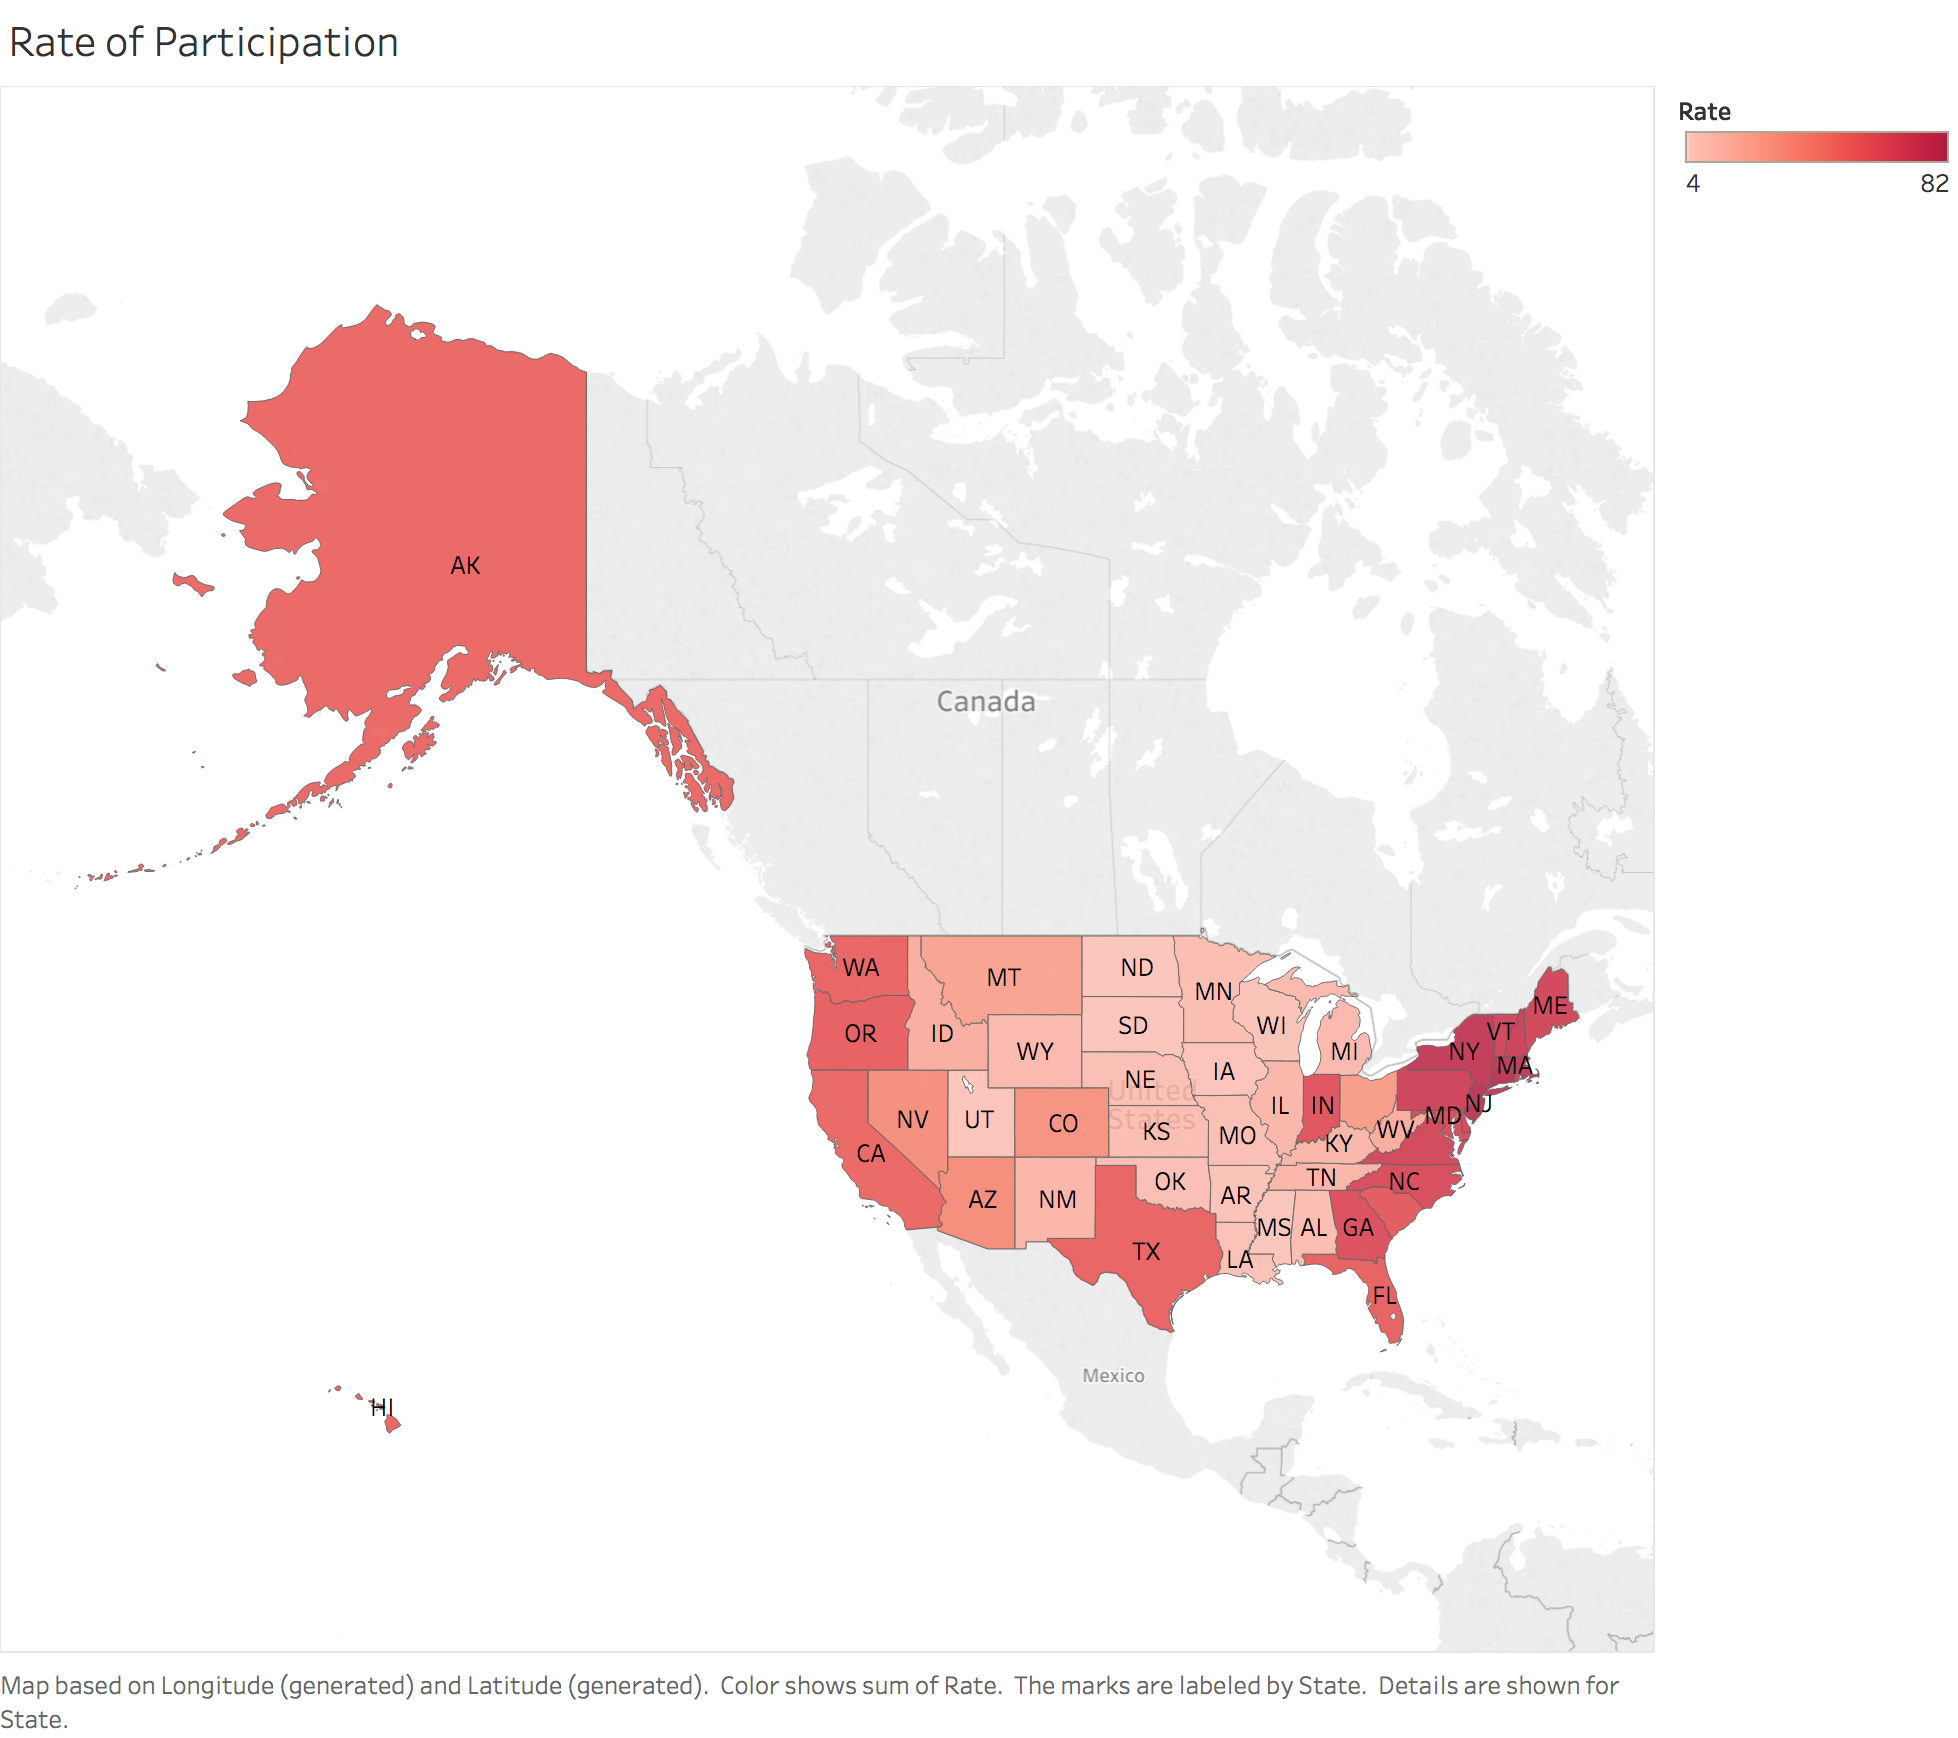

In [28]:
from IPython.display import Image
i = Image(filename='rate.png')
i


# very similar to Math's heat map.


In [ ]:
"""
This is an interesting finding.
This shows that SAT's are more widely used along the east coast.
It would be interesting to see a data set for ACT's rate of participation and test if a low participation rate for SAT
is related to high participation for ACT, and vice versa.

"""